In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import csim as cs

In [4]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import tensornetwork as tn

Calculating overlap with $|0\rangle$ is linear

In [5]:
%timeit cs.sample_process(5)

9 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%timeit cs.sample_process(10)

19.8 ms ± 509 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%timeit cs.sample_process(50)

105 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%timeit cs.sample_process(100)

213 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit cs.sample_process(500)

1.06 s ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit cs.sample_process(1000)

2.14 s ± 33.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Calculating overlap with every part is quadratic (although it is possible to speed it up to $O(n \log n)$)

In [11]:
%timeit len(cs.sample_all_qubits(10))

73.4 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit len(cs.sample_all_qubits(20))

269 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit len(cs.sample_all_qubits(40))

1.21 s ± 310 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit len(cs.sample_all_qubits(80))

3.98 s ± 214 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit len(cs.sample_all_qubits(160))

17.8 s ± 3.51 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


We can speed this up to $O(n\log n)$

In [16]:
%timeit len(cs.sample_all_qubits_faster(10))

81 ms ± 3.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%timeit len(cs.sample_all_qubits_faster(20))

259 ms ± 117 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit len(cs.sample_all_qubits_faster(40))

650 ms ± 254 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%timeit len(cs.sample_all_qubits_faster(80))

1.52 s ± 567 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%timeit len(cs.sample_all_qubits_faster(160))

1.72 s ± 671 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%timeit len(cs.sample_all_qubits_faster(320))

5.09 s ± 2.75 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%timeit len(cs.sample_all_qubits_faster(640))

8.95 s ± 866 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Verifying against cirq


In [23]:
import cirq

In [24]:
simulator = cirq.Simulator()

In [25]:
n_qubits = 10

In [29]:
l, c_length = cs.sample_ladder(n_qubits)

In [30]:
lp = [cirq.ops.matrix_gates.TwoQubitMatrixGate(g)(cirq.LineQubit(p[0]), cirq.LineQubit(p[1])) for p, g in l]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: cirq.TwoQubitMatrixGate was used but is deprecated.
It will be removed in cirq v0.8.
Use `cirq.MatrixGate` instead.

  """Entry point for launching an IPython kernel.


In [31]:
c2 = cirq.Circuit(lp[:(n_qubits - 1)])
c2 = c2 + cirq.inverse(c2[:-1])

In [32]:
%timeit r = simulator.simulate(c2)

4.8 ms ± 189 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
r = simulator.simulate(c2)

In [34]:
def benchmark_cirq(n_qubits, r):
    probs = []
    for i in range(n_qubits):
        p = r.density_matrix_of([cirq.LineQubit(i)])[0,0]
        probs.append(p)
    return probs
def benchmark_mps(n_qubits, m):
    probs = cs.get_all_probabilities(m.copy())
    return probs
def benchmark_mps_faster(n_qubits, m):
    probs = cs.get_all_probabilities_faster(m.copy())
    return probs

In [35]:
%timeit benchmark_cirq(n_qubits, r)

1.53 ms ± 28.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [36]:
benchmark_cirq(n_qubits, r)

[(0.83479816+0j),
 (0.77568775+0j),
 (0.7699617+0j),
 (0.7588313+0j),
 (0.73464864+0j),
 (0.71470517+0j),
 (0.6636907+0j),
 (0.5995486+0j),
 (0.42073184+0j),
 (0.2590464+0j)]

In [37]:
%timeit m = cs.compute_mps(n_qubits, l)

16.5 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
m = cs.compute_mps(n_qubits, l)

In [39]:
%timeit benchmark_mps(n_qubits, m)

79.9 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
benchmark_mps(n_qubits, m)

[array(0.83479896),
 array(0.77568858),
 array(0.76996231),
 array(0.75883192),
 array(0.73464919),
 array(0.7147057),
 array(0.66369113),
 array(0.59954893),
 array(0.42073198),
 array(0.25904644)]

In [41]:
%timeit benchmark_mps_faster(n_qubits, m)

38.4 ms ± 7.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
benchmark_mps_faster(n_qubits, m)

[array(0.83479896),
 array(0.77568858),
 array(0.76996231),
 array(0.75883192),
 array(0.73464919),
 array(0.7147057),
 array(0.66369113),
 array(0.59954893),
 array(0.42073198),
 array(0.25904644)]

# Quick benchmark

In [43]:
# when things are not the same
ps_nosame = []
for x in tqdm(range(2000)):
    ps_nosame.append(cs.sample_all_qubits_faster(50, all_same=False))
ps_nosame = np.array(ps_nosame)

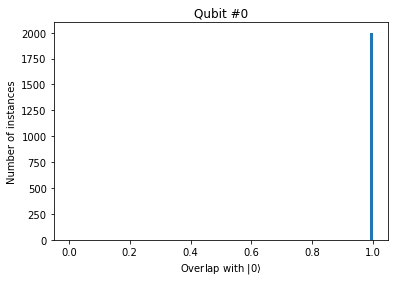

In [44]:
plt.hist(ps_nosame[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.xlabel(r"Overlap with $|0\rangle$")
plt.ylabel("Number of instances")
plt.show()

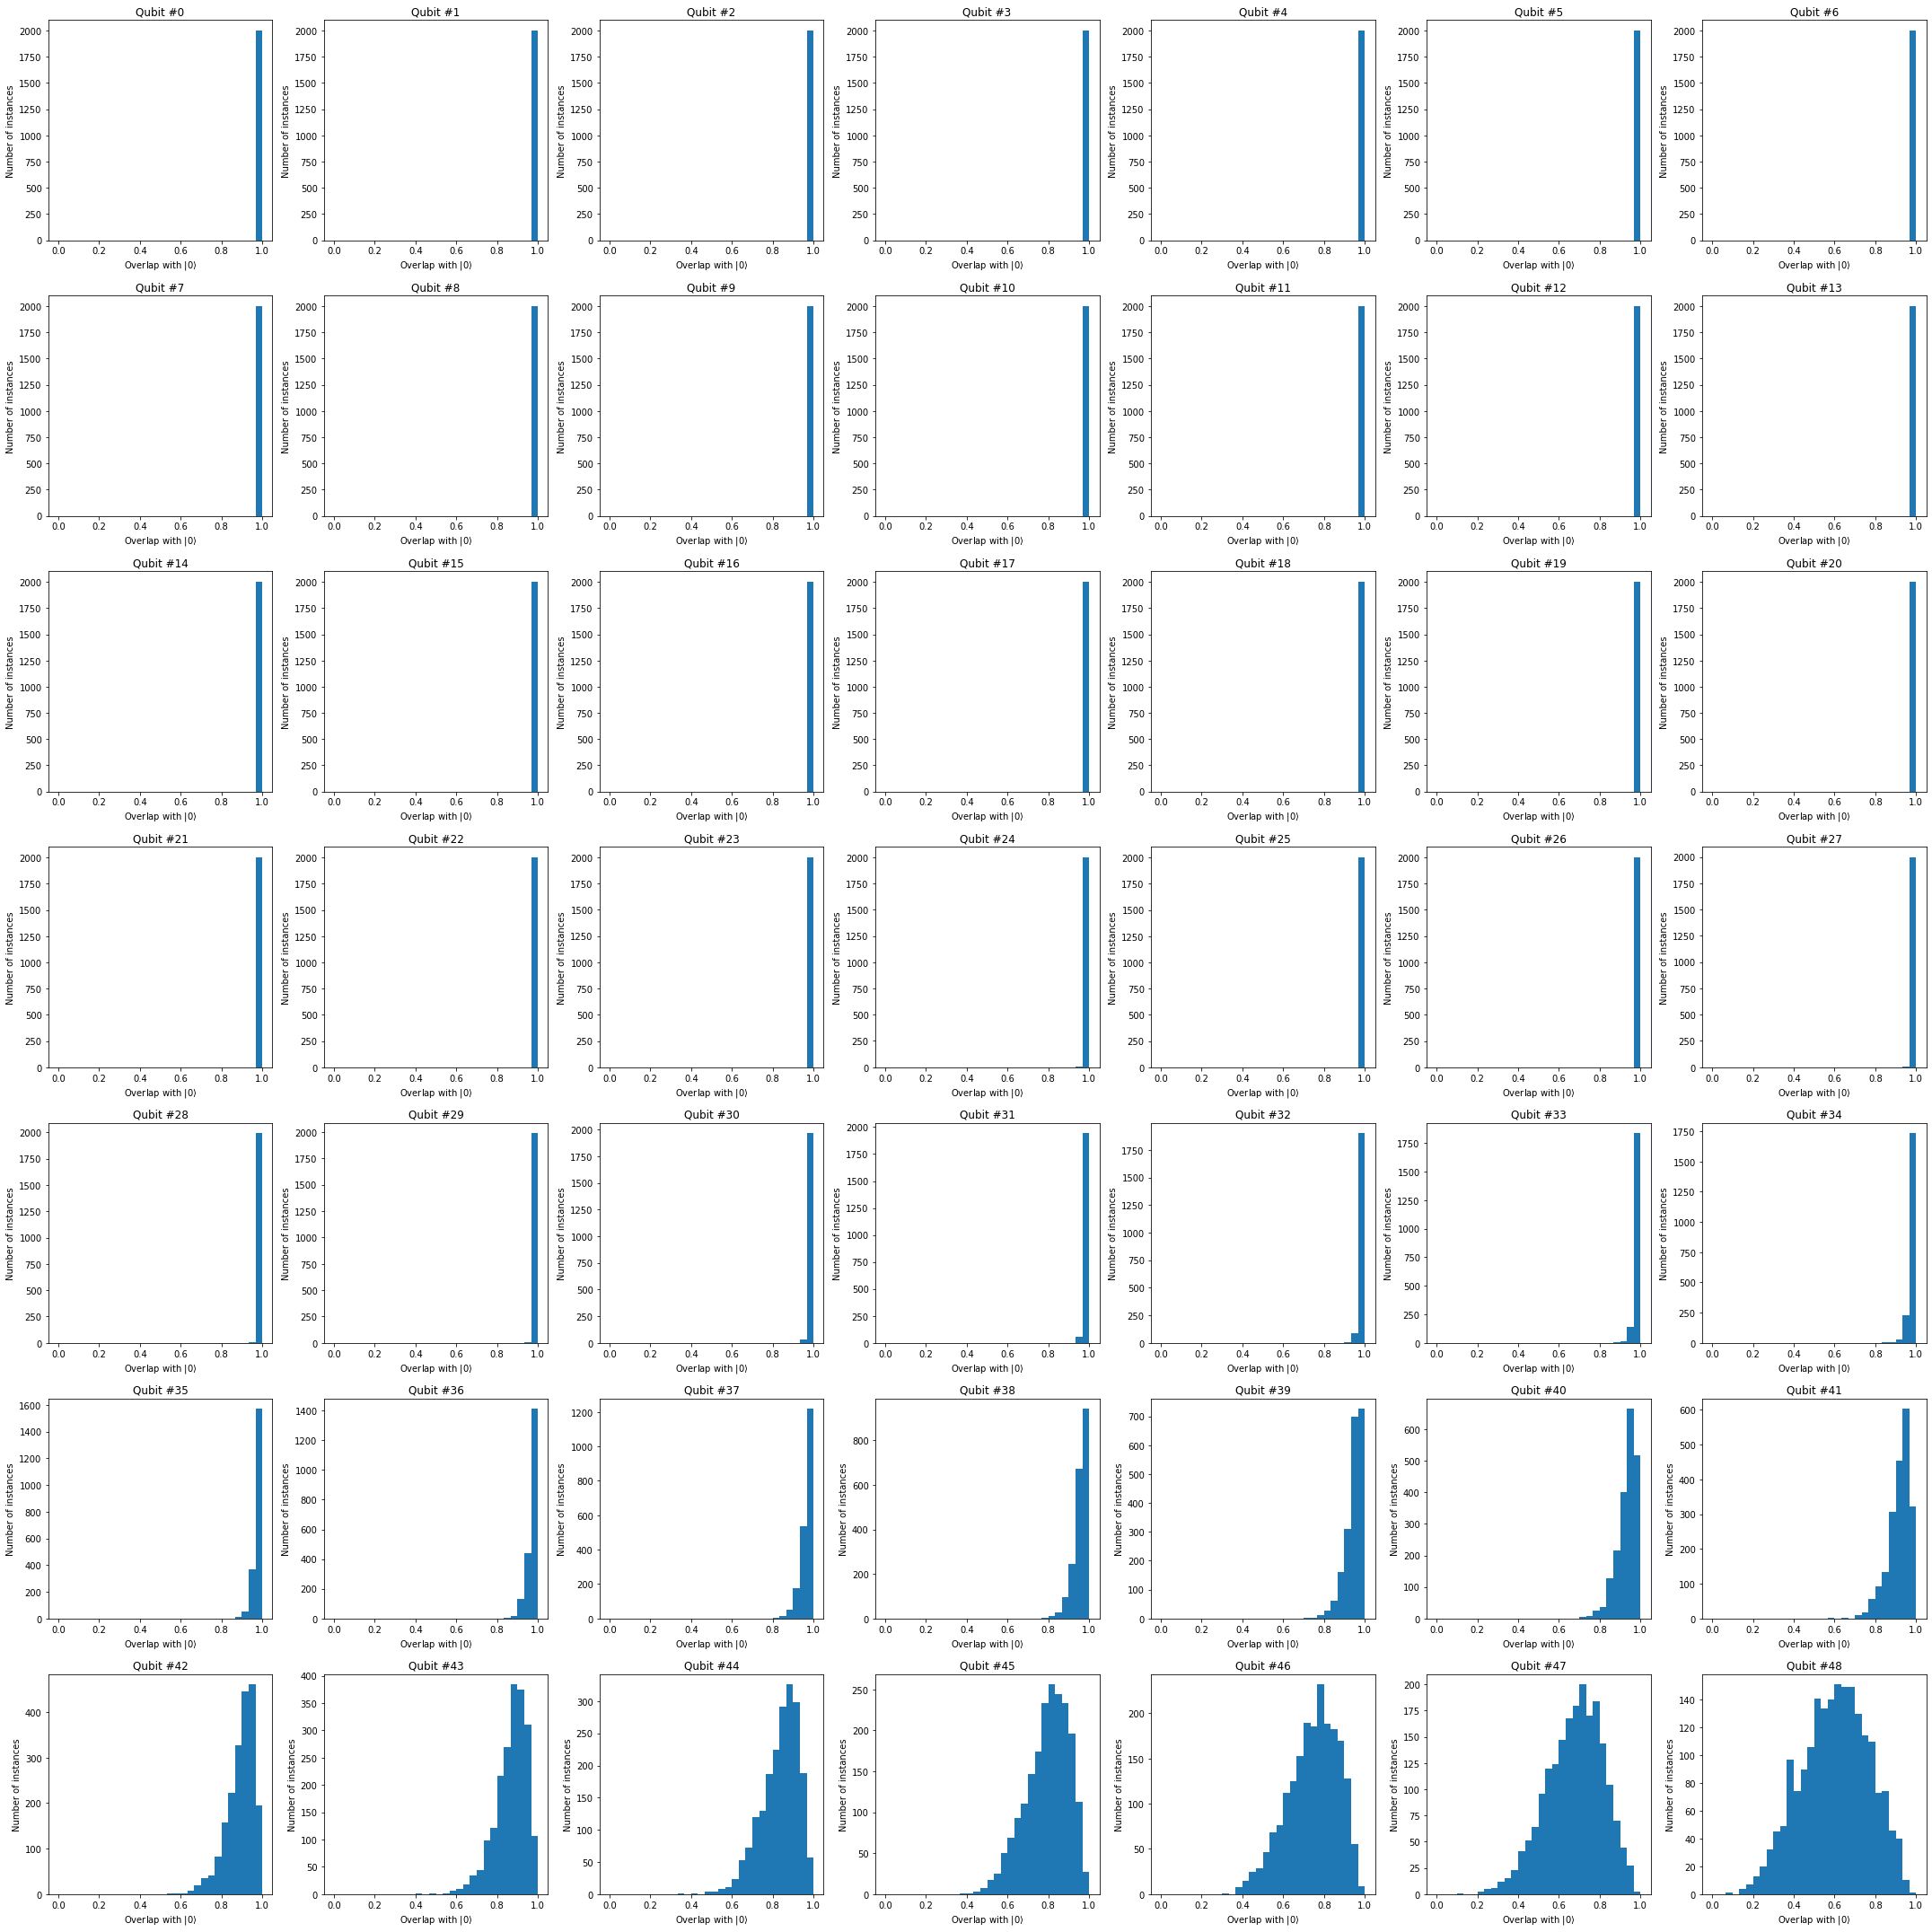

In [45]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(49):
    ax=fig.add_subplot(7,7, i+1)
    ax.hist(ps_nosame[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_xlabel(r"Overlap with $|0\rangle$")
    ax.set_ylabel("Number of instances")

fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


In [46]:
top3 = [cs.sample_top_k(30) for i in tqdm(range(1000))]

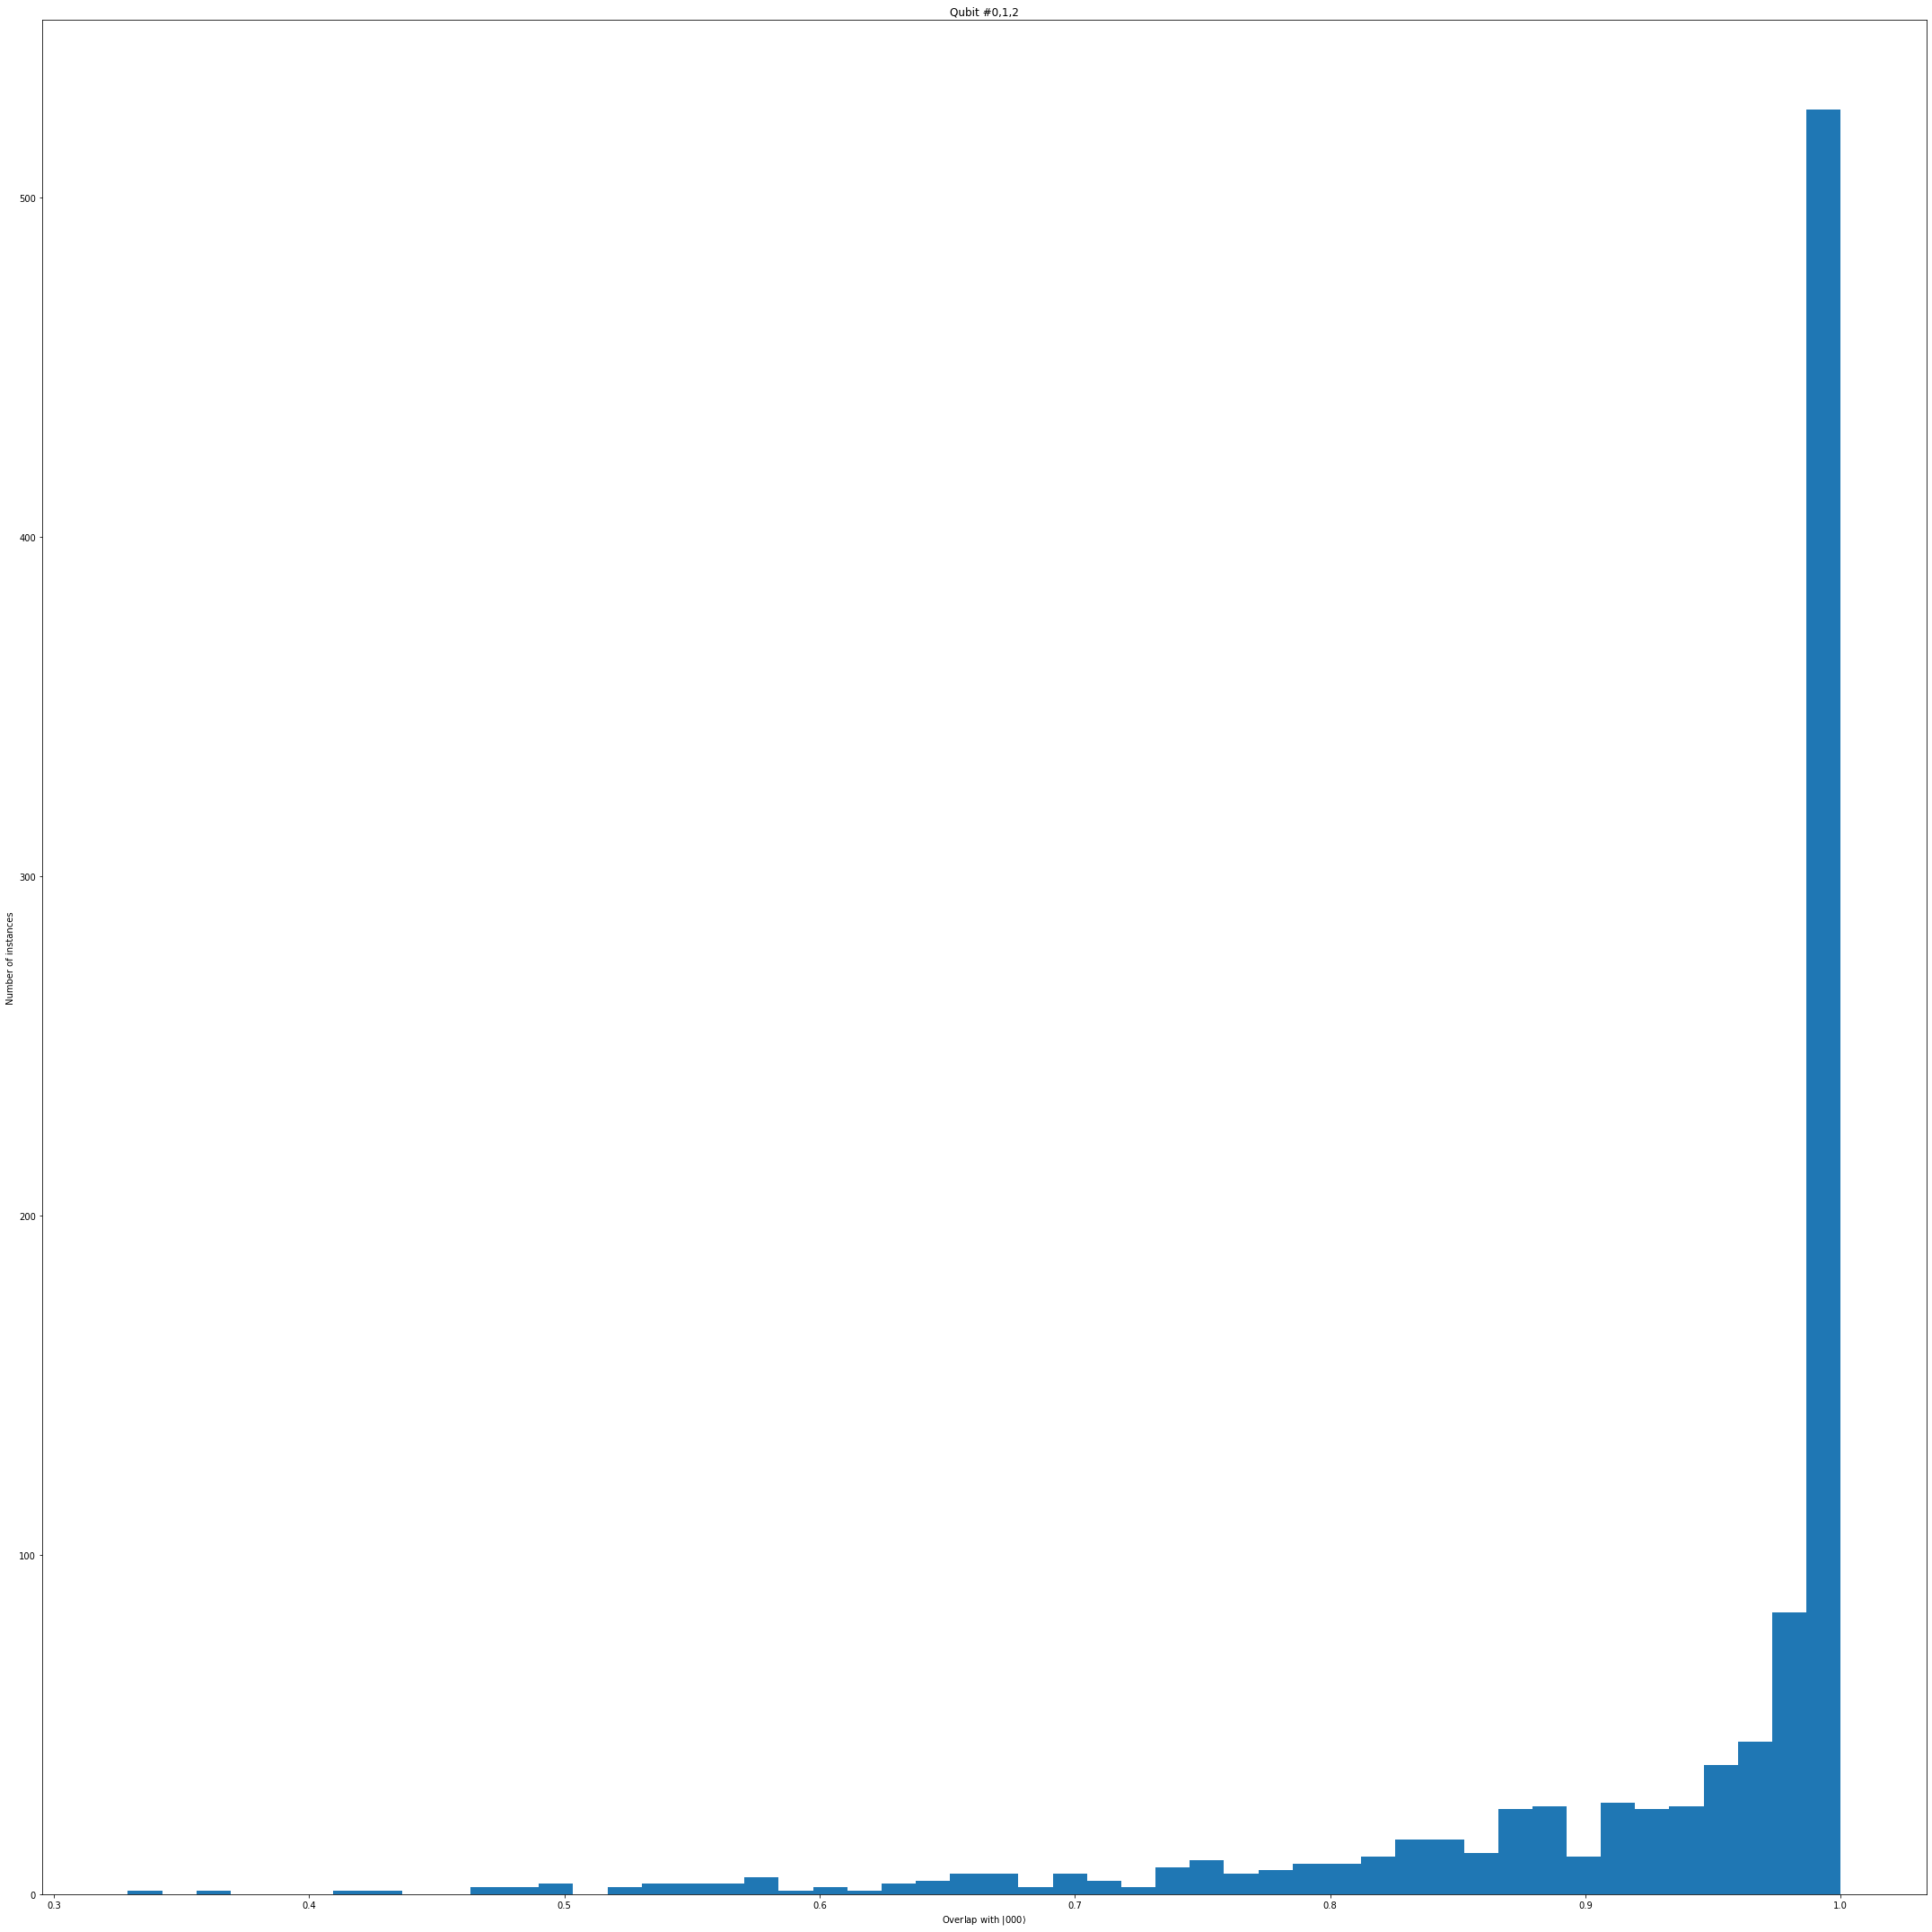

In [47]:
fig=plt.figure(figsize=(30, 30))
t = 0
ax=fig.add_subplot(1,1, 1)
ax.hist(top3, bins = 50)
ax.set_title("Qubit #0,1,2")
ax.set_xlabel(r"Overlap with $|000\rangle$")
ax.set_ylabel("Number of instances")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()
# Note the range

# New ladder

In [48]:
ps = []
for x in tqdm(range(200)):
    ps.append(cs.sample_better_ladder_faster_probabilities(4,1))
ps = np.array(ps)

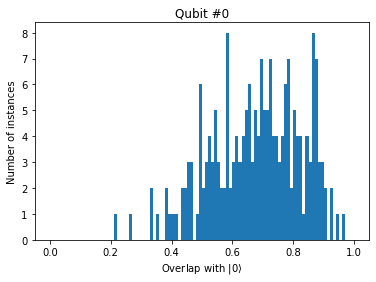

In [49]:
plt.hist(ps[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.xlabel(r"Overlap with $|0\rangle$")
plt.ylabel("Number of instances")
plt.show()

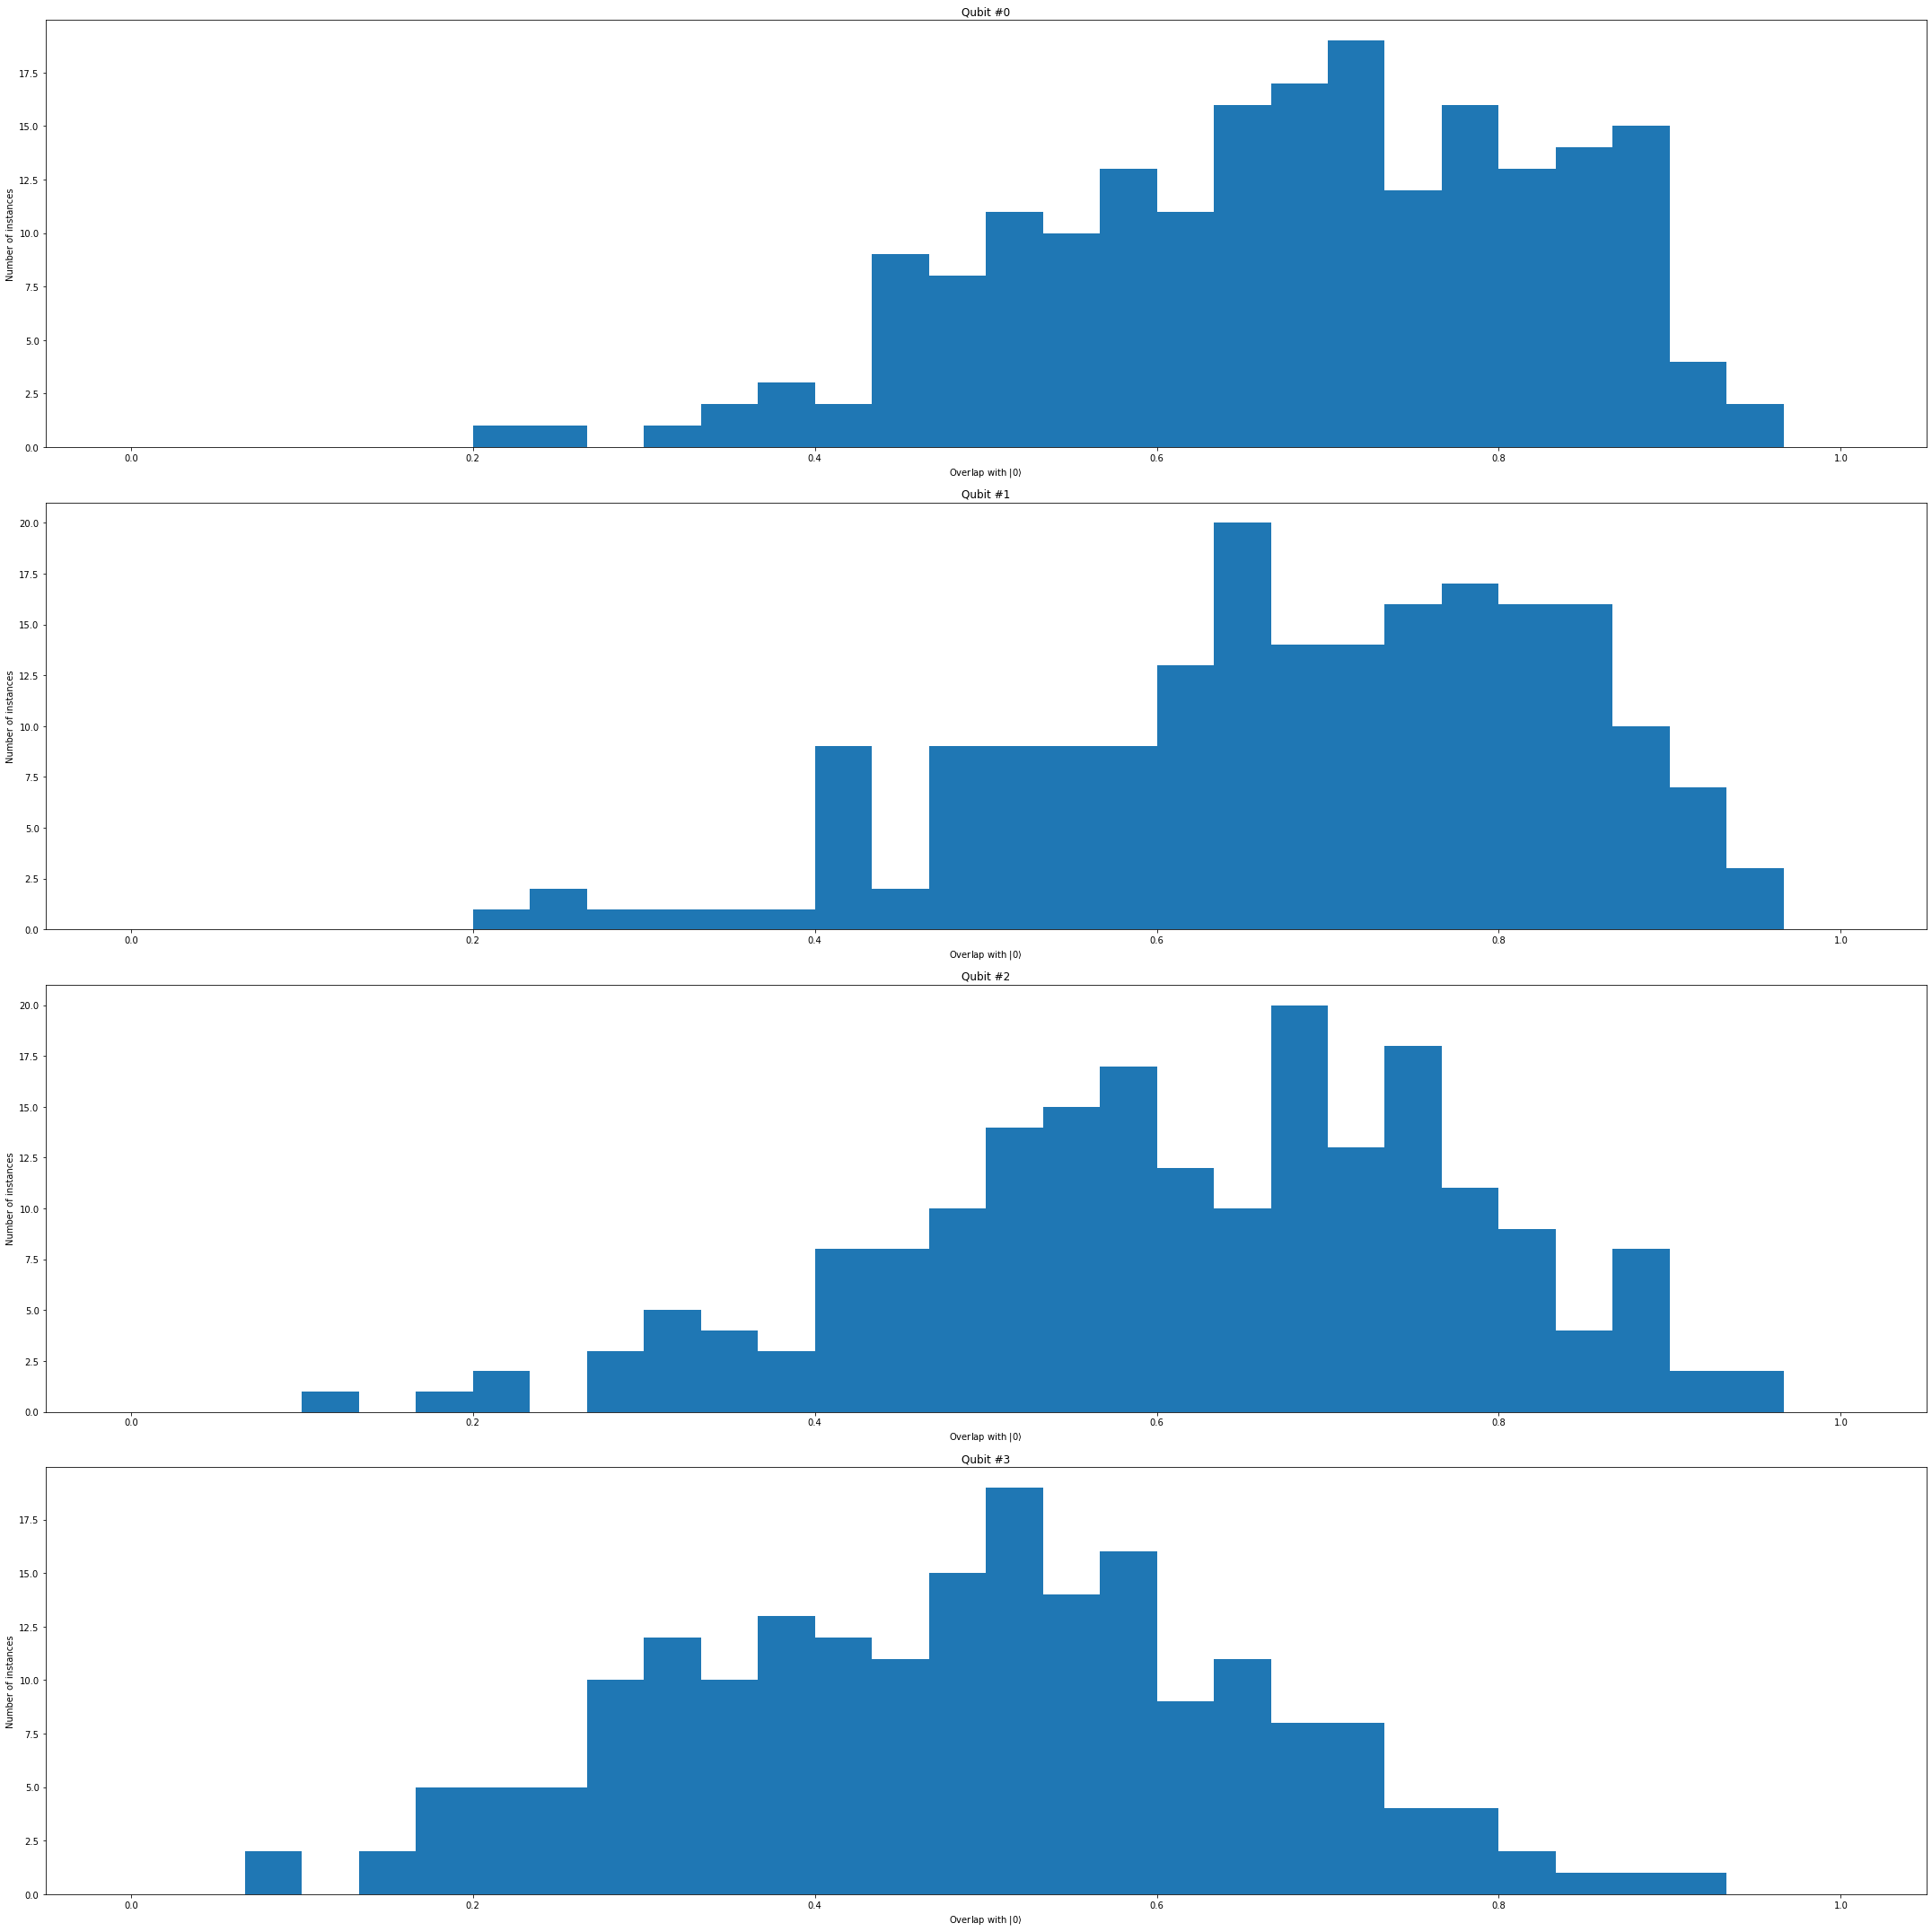

In [50]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(4):
    ax=fig.add_subplot(4,1, i+1)
    ax.hist(ps[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_xlabel(r"Overlap with $|0\rangle$")
    ax.set_ylabel("Number of instances")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


In [51]:
ps = []
for x in tqdm(range(200)):
    ps.append(cs.sample_better_ladder_faster_probabilities(3*3+1,2))
ps = np.array(ps)

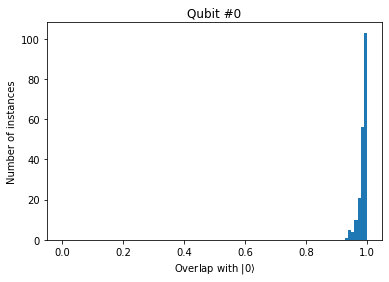

In [52]:
plt.hist(ps[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.xlabel(r"Overlap with $|0\rangle$")
plt.ylabel("Number of instances")
plt.show()

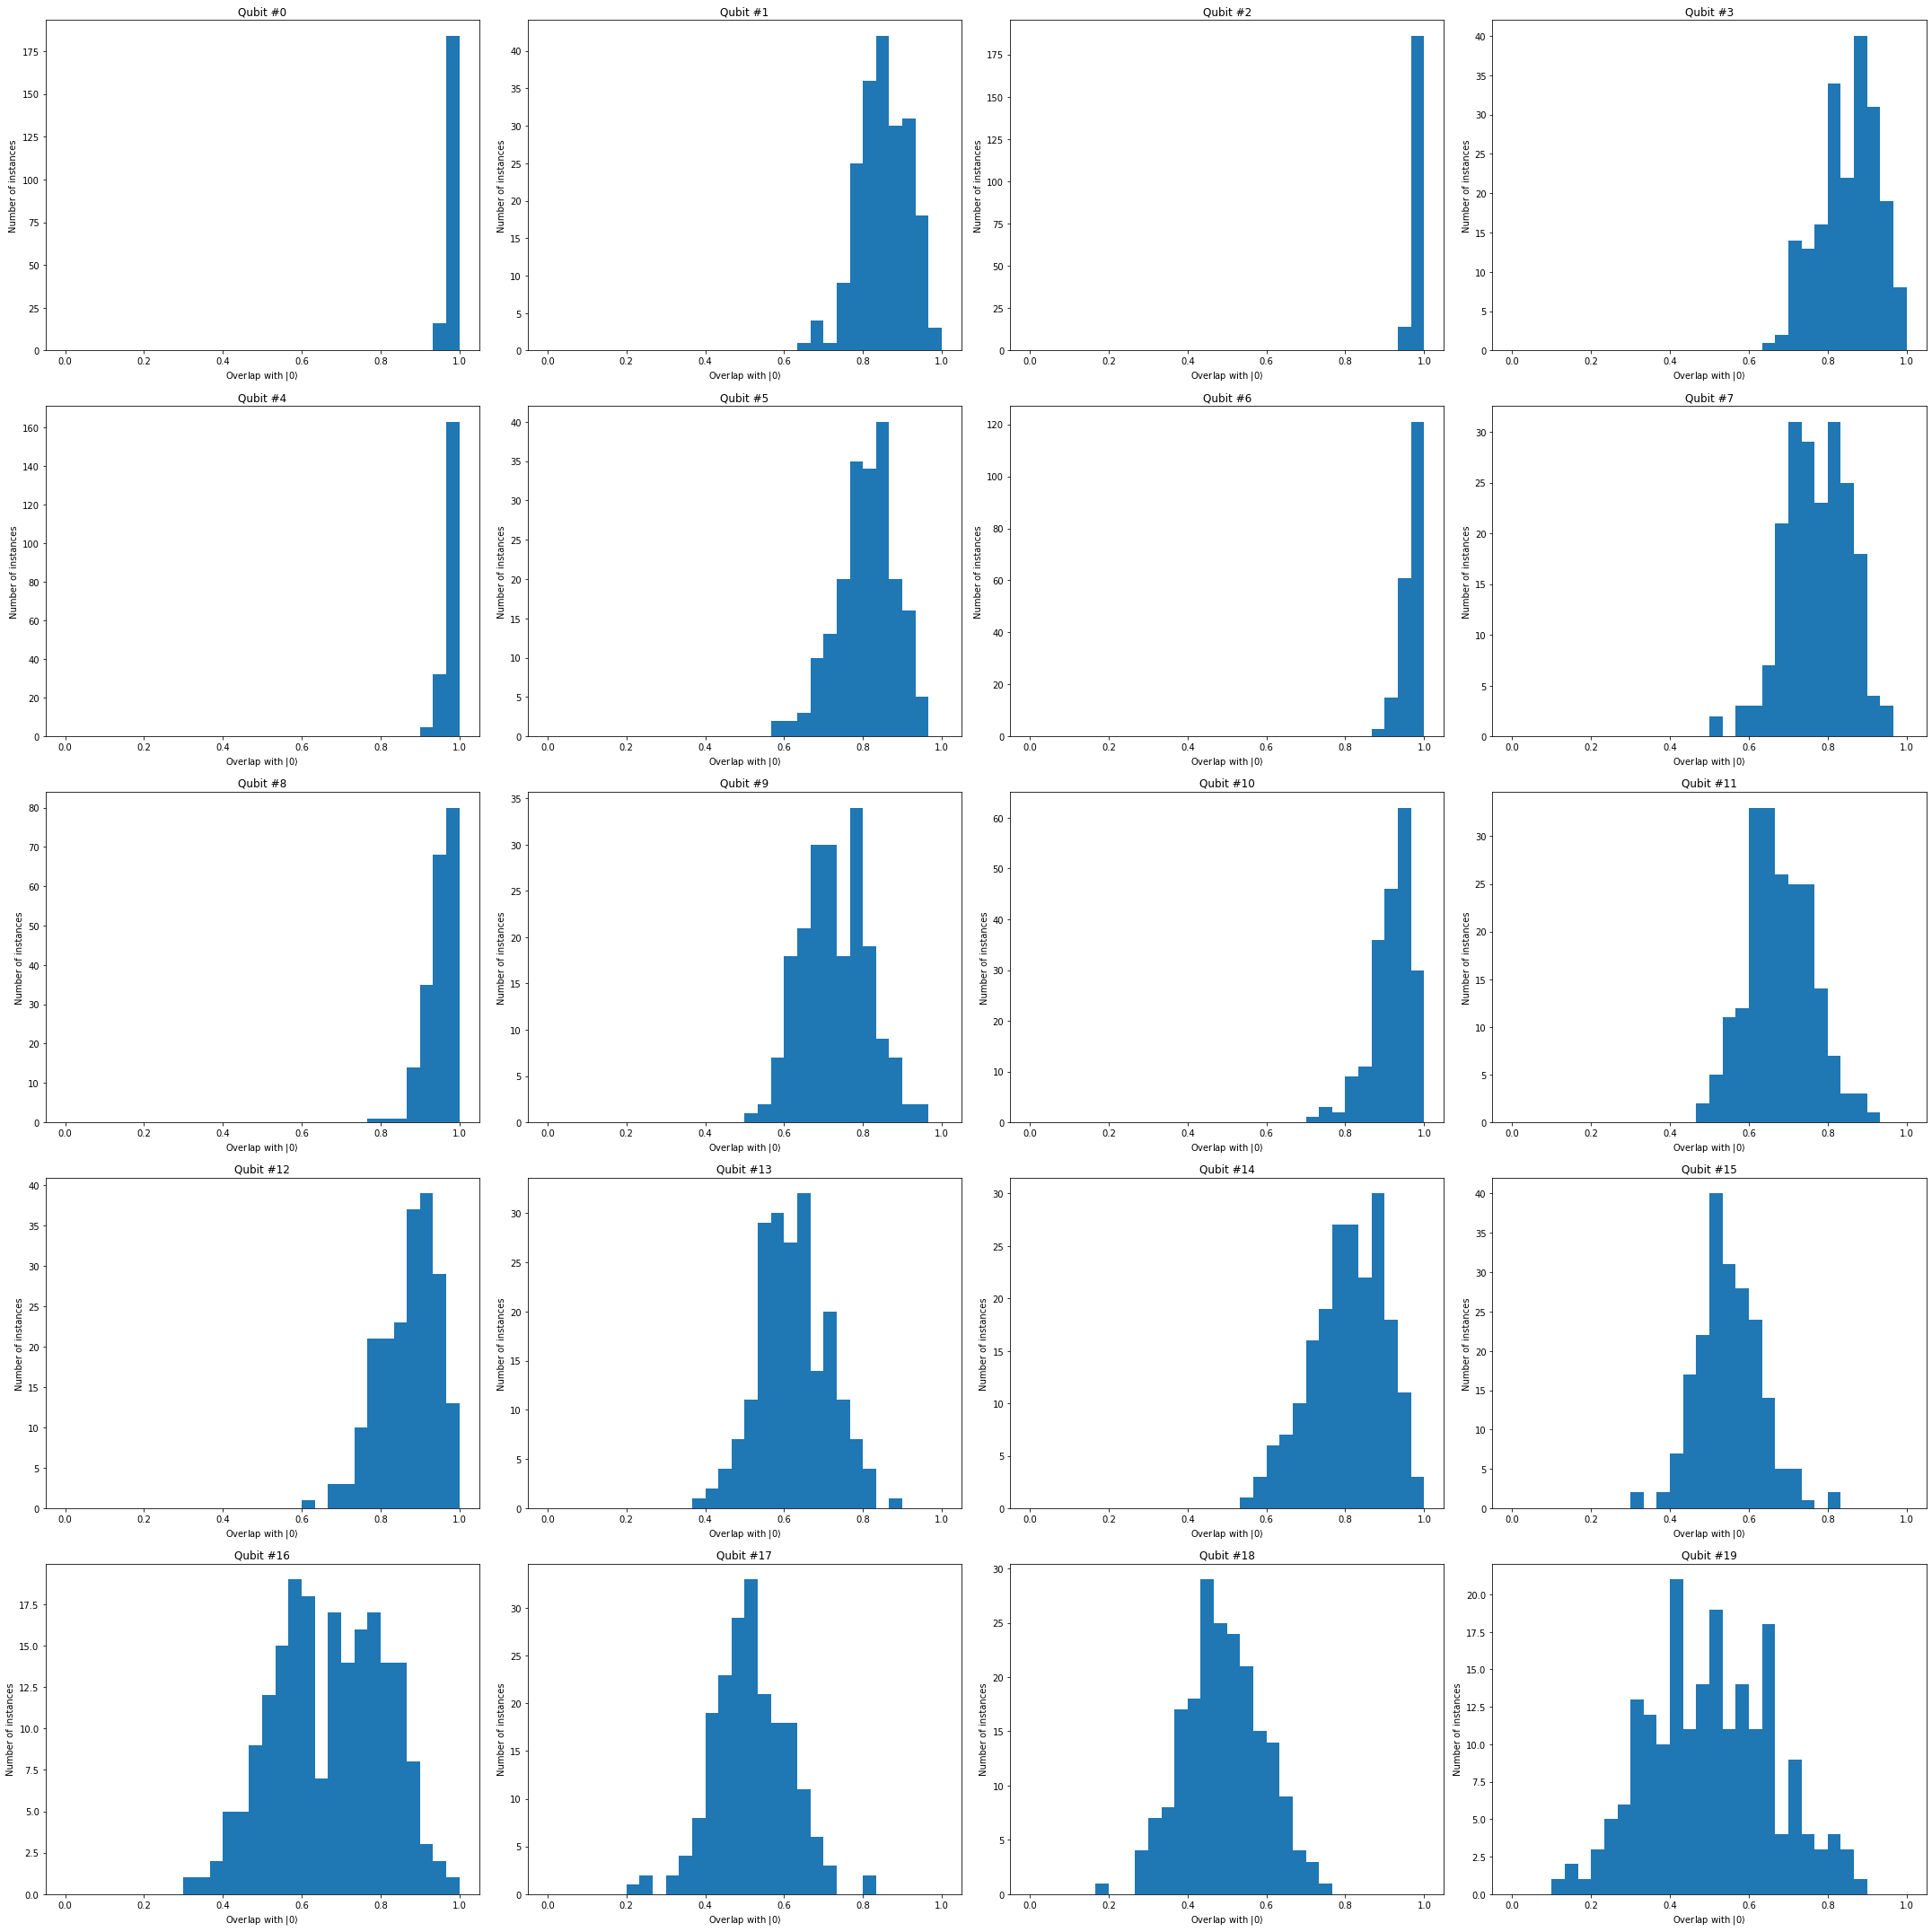

In [53]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(10*2):
    ax=fig.add_subplot(5,4, i+1)
    ax.hist(ps[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_xlabel(r"Overlap with $|0\rangle$")
    ax.set_ylabel("Number of instances")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


In [54]:
ps = []

In [ ]:
for x in tqdm(range(len(ps),200)):
    ps.append(cs.sample_better_ladder_faster_probabilities(5,3))
ps = np.array(ps)

In [ ]:
plt.hist(ps[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.xlabel(r"Overlap with $|0\rangle$")
plt.ylabel("Number of instances")
plt.show()

In [ ]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(15):
    ax=fig.add_subplot(5,3, i+1)
    ax.hist(ps[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_xlabel(r"Overlap with $|0\rangle$")
    ax.set_ylabel("Number of instances")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


## Eigenvalues vs bias

In [5]:
circ, c_length = cs.sample_ladder(30)
m=cs.compute_mps(30, circ)
bias = 1-m.probability_zero_at_sites([0])
print("correlation length={}, bias={}".format(c_length, bias))

correlation length=1.6311884192495087, bias=0.006811393737212734


In [6]:
itt = 1000
n_q=30
samples_bias = []
samples_clength = []
for i in tqdm(range(itt)):
    circ, c_length = cs.sample_ladder(n_q)
    m=cs.compute_mps(n_q, circ)
    bias = 1-m.probability_zero_at_sites([0])
    samples_bias.append(bias)
    samples_clength.append(c_length)

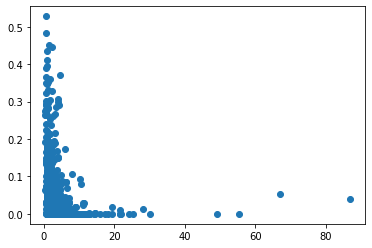

In [30]:
plt.scatter(samples_clength, samples_bias)